<a href="https://colab.research.google.com/github/afifibd/Machine-Learning/blob/main/Week-9/Neural_Network_Lecture_9_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Afif Ibadurrahman J

NIM : 1103210221

Lecture 9 : Binary Classsification Using Neural Network

Dataset : housepricedata.csv

Link ChatGPT : [Link](https://chatgpt.com/share/e83a3380-c703-483b-a366-23810b720de4)

# Import library

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

# Load dan persiapkan dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Gantilah path berikut dengan path ke file dataset kamu di Google Drive
file_path = '/content/drive/MyDrive/Dataset/housepricedata.csv'

# Membaca dataset ke dalam DataFrame
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari DataFrame
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [8]:
# Assume the dataset is loaded into a DataFrame called df
# For the example, let's create the DataFrame manually
data = {
    'LotArea': [8450, 9600, 11250, 9550, 14260],
    'OverallQual': [7, 6, 7, 7, 8],
    'OverallCond': [5, 8, 5, 5, 5],
    'TotalBsmtSF': [856, 1262, 920, 756, 1145],
    'FullBath': [2, 2, 2, 1, 2],
    'HalfBath': [1, 0, 1, 0, 1],
    'BedroomAbvGr': [3, 3, 3, 3, 4],
    'TotRmsAbvGrd': [8, 6, 6, 7, 9],
    'Fireplaces': [0, 1, 1, 1, 1],
    'GarageArea': [548, 460, 608, 642, 836],
    'AboveMedianPrice': [1, 1, 1, 0, 1]
}

df = pd.DataFrame(data)

In [9]:
# Separate features and target
X = df.drop('AboveMedianPrice', axis=1)
y = df['AboveMedianPrice']

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Split temp data into validation (50%) and test (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Membangun model neural network

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])


In [11]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.7041 - accuracy: 0.3333 - val_loss: 0.6354 - val_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 88ms/step - loss: 0.7000 - accuracy: 0.3333 - val_loss: 0.6317 - val_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 40ms/step - loss: 0.6959 - accuracy: 0.3333 - val_loss: 0.6280 - val_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 42ms/step - loss: 0.6920 - accuracy: 0.3333 - val_loss: 0.6243 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 42ms/step - loss: 0.6881 - accuracy: 0.3333 - val_loss: 0.6207 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 45ms/step - loss: 0.6843 - accuracy: 0.3333 - val_loss: 0.6173 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 42ms/step - loss: 0.6806 - accuracy: 0.3333 - val_loss: 0.6137 - val_accuracy: 1.0000
Epoch 8/100
1/1 [=====

# Visualisasi Model

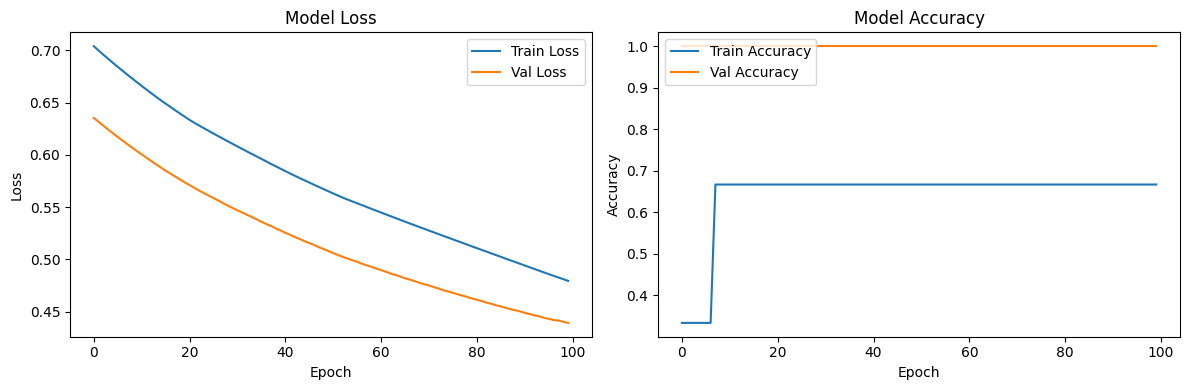

In [12]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
